In [0]:
!pip install quandl


In [0]:
from pandas_datareader import data
from matplotlib import pyplot as plt
import pandas as pd
import datetime
import numpy as np
import quandl
quandl.ApiConfig.api_key = 'HyGnsQDxvHy2P6FAK_DV'

We are going to take stock market data from API's like Quandl, morningstar and cluster them into similar groups based off stock market movements over the years. For this we are going to apply the K-means clustering algorithm.
 
 

In [180]:
companies_dict = {
'Amazon': 'AMZN',
'Apple': 'AAPL',
'Walgreen': 'WBA',
'Northrop Grumman': 'NOC',
'Boeing': 'BA',
'Lockheed Martin': 'LMT',
'McDonalds': 'MCD',
'Intel': 'INTC',
'Navistar': 'NAV',  
'IBM': 'IBM',
'Texas Instruments': 'TXN',
'MasterCard': 'MA',
'Microsoft': 'MSFT',
'General Electrics': 'GE',
'Symantec': 'SYMC',
'Pepsi': 'PEP',
'Coca Cola': 'KO',
'Johnson & Johnson': 'JNJ',
'Exxon': 'XOM',
'Valero Energy': 'VLO',
'Bank of America': 'BAC',
'Pfizer': 'PFE',
'Abbot Labs': 'ABT',
'Kellogg':'K',
'Chevron':'CVX',
    
}

companies = sorted(companies_dict.items(), key=lambda x: x[1])

print(companies)


[('Apple', 'AAPL'), ('Abbot Labs', 'ABT'), ('Amazon', 'AMZN'), ('Boeing', 'BA'), ('Bank of America', 'BAC'), ('Chevron', 'CVX'), ('General Electrics', 'GE'), ('IBM', 'IBM'), ('Intel', 'INTC'), ('Johnson & Johnson', 'JNJ'), ('Kellogg', 'K'), ('Coca Cola', 'KO'), ('Lockheed Martin', 'LMT'), ('MasterCard', 'MA'), ('McDonalds', 'MCD'), ('Microsoft', 'MSFT'), ('Navistar', 'NAV'), ('Northrop Grumman', 'NOC'), ('Pepsi', 'PEP'), ('Pfizer', 'PFE'), ('Symantec', 'SYMC'), ('Texas Instruments', 'TXN'), ('Valero Energy', 'VLO'), ('Walgreen', 'WBA'), ('Exxon', 'XOM')]


In [181]:

stocko = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'AMZN', 'BA', 'BAC', 'GE', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSFT', 'NAV', 'NOC', 'PEP', 'SYMC', 'TXN', 'VLO', 'WBA', 'XOM', 'PFE','ABT','K','CVX'],
                        qopts = { 'columns': ['ticker', 'date', 'Open'] }, 
                        date = { 'gte': '2016-12-31', 'lte': '2018-12-31' }, 
                        paginate=True)

new = stocko.set_index('date')

stock_open= new.pivot(columns='ticker')

stock_open.fillna(0, inplace=True)#basic assumption if opening data unavailable, closing also unavailabe

print(stock_open)

stockc = quandl.get_table('WIKI/PRICES', ticker = ['AAPL', 'AMZN', 'BA', 'BAC', 'GE', 'IBM', 'INTC', 'JNJ', 'KO', 'LMT', 'MA', 'MCD', 'MSFT', 'NAV', 'NOC', 'PEP', 'SYMC', 'TXN', 'VLO', 'WBA', 'XOM', 'PFE','ABT','K','CVX'],
                        qopts = { 'columns': ['ticker', 'date', 'Close'] },
                        date = { 'gte': '2016-12-31', 'lte': '2018-12-31' }, 
                        paginate=True)

new = stockc.set_index('date')


stock_close= new.pivot(columns='ticker')

stock_close.fillna(0, inplace=True)
print(stock_close)


               open                              ...                             
ticker         AAPL      ABT     AMZN        BA  ...     TXN    VLO    WBA    XOM
date                                             ...                             
2017-01-03  115.800  38.6334   757.92  156.3000  ...   73.53  69.55  83.10  90.94
2017-01-04  115.850  39.0600   758.39  157.8100  ...   73.65  69.54  83.30  91.12
2017-01-05  115.920  39.2400   761.55  158.4100  ...   73.29  68.39  82.00  90.19
2017-01-06  116.780  39.7000   782.36  158.9800  ...   72.88  67.70  83.08  88.79
2017-01-09  117.950  40.7900   798.00  159.0000  ...   74.51  66.22  82.81  88.22
2017-01-10  118.770  40.8100   796.60  158.9600  ...   74.62  66.32  82.41  87.17
2017-01-11  118.740  41.0500   793.66  159.5400  ...   74.64  66.78  83.01  85.90
2017-01-12  118.895  40.7900   800.31  159.1500  ...   75.00  66.24  84.15  87.27
2017-01-13  119.110  40.7500   814.32  158.7400  ...   74.83  66.21  83.94  86.27
2017-01-17  118.

Incase you would like to use any other online source instead of quandl, use pandas_datareader


data_source = 'morningstar'//depriciated


start_date = '2015-01-01'
end_date = '2017-12-31'


panel_data = data.DataReader(companies_dict.values(), data_source, start_date, end_date).unstack(level=0)


stock_close = panel_data['Close']
stock_open = panel_data['Open']

print(stock_close.iloc[0])


In [182]:
stock_close = np.array(stock_close).T  #.T for Transpose
stock_open = np.array(stock_open).T

row, col = stock_close.shape

movements = np.zeros([row, col])


for i in range(0, len(companies)):
    movements[i,:] = np.subtract(stock_close[i,:], stock_open[i,:])

for i in range(0, row):
   print('Company: {}, Change: {}'.format(companies[i][:], sum(movements[i][:])))

#add more companies if you wish to but make sure there is no Nan in it 



Company: ('Apple', 'AAPL'), Change: 18.156099999999896
Company: ('Abbot Labs', 'ABT'), Change: 14.755599999999866
Company: ('Amazon', 'AMZN'), Change: -27.05500000000029
Company: ('Boeing', 'BA'), Change: 73.7655000000004
Company: ('Bank of America', 'BAC'), Change: -2.5699999999999648
Company: ('Chevron', 'CVX'), Change: -13.279000000000067
Company: ('General Electrics', 'GE'), Change: -15.076
Company: ('IBM', 'IBM'), Change: -30.626000000000005
Company: ('Intel', 'INTC'), Change: 6.495099999999937
Company: ('Johnson & Johnson', 'JNJ'), Change: 9.440000000000012
Company: ('Kellogg', 'K'), Change: -12.060000000000123
Company: ('Coca Cola', 'KO'), Change: 3.7549999999999457
Company: ('Lockheed Martin', 'LMT'), Change: 21.605000000000274
Company: ('MasterCard', 'MA'), Change: 20.03499999999994
Company: ('McDonalds', 'MCD'), Change: 14.064999999999785
Company: ('Microsoft', 'MSFT'), Change: 2.2550000000000026
Company: ('Navistar', 'NAV'), Change: -16.14499999999994
Company: ('Northrop Gru

In [183]:
# Import Normalizer
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans


# Create a normalizer: normalizer
normalizer = Normalizer()
new = normalizer.fit_transform(movements)

print(new.max())
print(new.min())
print(new.mean())

0.34420207311875683
-0.36327093647747827
0.00023108809752302065


In [184]:
# Normalizer for use in pipeline
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10, max_iter=1000)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer, kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

print(kmeans.inertia_)

6.86905189169854


In [186]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

    labels                 companies
12       0    (Lockheed Martin, LMT)
17       0   (Northrop Grumman, NOC)
3        0              (Boeing, BA)
5        1            (Chevron, CVX)
24       1              (Exxon, XOM)
2        2            (Amazon, AMZN)
21       2  (Texas Instruments, TXN)
15       2         (Microsoft, MSFT)
13       2          (MasterCard, MA)
0        2             (Apple, AAPL)
8        2             (Intel, INTC)
1        3         (Abbot Labs, ABT)
19       3             (Pfizer, PFE)
9        3  (Johnson & Johnson, JNJ)
14       3          (McDonalds, MCD)
23       4           (Walgreen, WBA)
10       5              (Kellogg, K)
4        6    (Bank of America, BAC)
7        6                (IBM, IBM)
16       6           (Navistar, NAV)
6        6   (General Electrics, GE)
11       7           (Coca Cola, KO)
18       7              (Pepsi, PEP)
22       8      (Valero Energy, VLO)
20       9          (Symantec, SYMC)


This looks fine, but Symantec, VLO, GE, MCD these look a bit odd, lets see


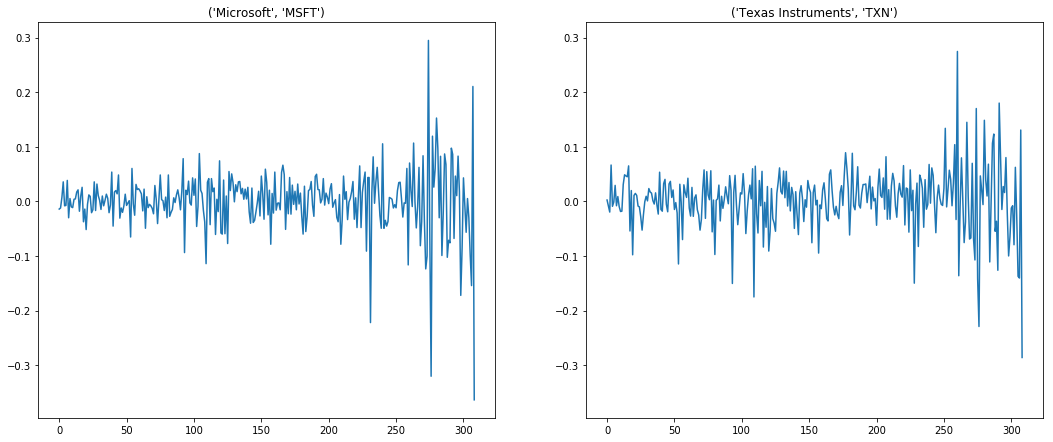

In [189]:
# Visualization - Plot Stock Movements
plt.clf
plt.figure(figsize=(18, 16))
ax1 = plt.subplot(221)
plt.plot(new[15][:])#change company label
plt.title(companies[15])#change company title

plt.subplot(222, sharey=ax1)
plt.plot(new[21][:])#change company label
plt.title(companies[21])#change company title
plt.show()

The graphs give us a good idea as to why they are classified or not classified in the same group



    labels                 companies
20       0          (Symantec, SYMC)
3        0              (Boeing, BA)
8        0             (Intel, INTC)
24       1              (Exxon, XOM)
5        1            (Chevron, CVX)
6        1   (General Electrics, GE)
9        2  (Johnson & Johnson, JNJ)
19       2             (Pfizer, PFE)
7        3                (IBM, IBM)
23       3           (Walgreen, WBA)
10       4              (Kellogg, K)
22       5      (Valero Energy, VLO)
4        5    (Bank of America, BAC)
17       6   (Northrop Grumman, NOC)
12       6    (Lockheed Martin, LMT)
1        6         (Abbot Labs, ABT)
14       6          (McDonalds, MCD)
15       7         (Microsoft, MSFT)
13       7          (MasterCard, MA)
2        7            (Amazon, AMZN)
21       7  (Texas Instruments, TXN)
0        7             (Apple, AAPL)
18       8              (Pepsi, PEP)
11       8           (Coca Cola, KO)
16       9           (Navistar, NAV)


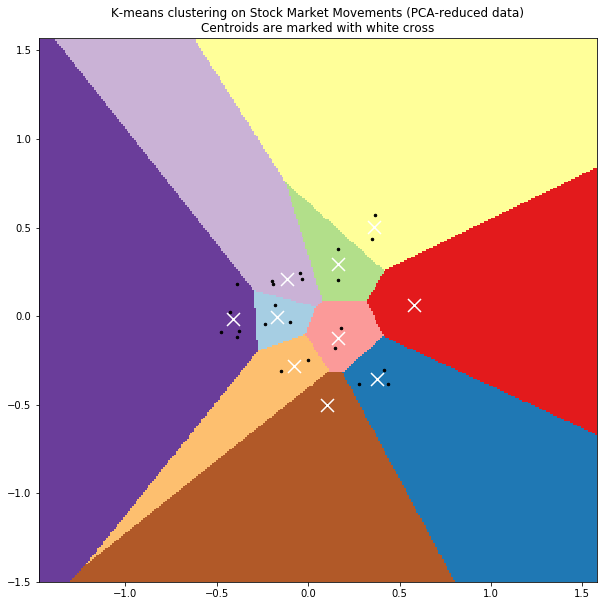

In [190]:
from sklearn.decomposition import PCA

# Visualize the results on PCA-reduced data
# Principal component analysis (PCA)
# Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space

reduced_data = PCA(n_components=2).fit_transform(new)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)
labels = kmeans.predict(reduced_data)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values('labels'))

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# Define Colormap
cmap = plt.cm.Paired

plt.figure(figsize=(10, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=cmap,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=5)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on Stock Market Movements (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show() 